Imports:

In [3]:
import cv2
import numpy as np
import torch
from torchvision import transforms
import time
import torch.nn as nn
import torch.optim as optim
import os
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
from PIL import Image 
import random
import json
from torchvision.models import resnet152
from torchvision.datasets import ImageFolder
from torch.utils import data
import matplotlib.pyplot as plt
from torchvision.models import resnet152 as Model
from torchvision.models.resnet import ResNet152_Weights as ModelW



In [4]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU for training.")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU for training.")

Using GPU for training.


In [6]:
%run "../DL_project/src/dataloading.ipynb"
%run "../DL_project/src/training.ipynb"
%run "../DL_project/src/evaluate.ipynb"
%run "../DL_project/src/visualizations.ipynb"
%run "../DL_project/src/model_architectures.ipynb"

Data loaded


In [9]:

data_path = "..\Data"
class_names = [folder_name for folder_name in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, folder_name))]


In [7]:
model = GradCAM(num_classes=4)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0001)

epochs = 15


training_losses = []
validation_losses = []
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    train_set, val_set = torch.utils.data.random_split(training_set, [1 - val_ratio, val_ratio])
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=batch_size,shuffle=True)

    train_loss, train_accuracy, train_labels, train_preds = train(model, train_loader=train_loader,optimizer=optimizer, criterion=criterion, device=device)
    val_loss, val_accuracy, val_labels, val_preds = evaluate(model, val_loader, criterion=criterion, device=device)
    training_losses.append(train_loss)
    validation_losses.append(val_loss)

    tqdm.write(
        f"Epoch [{epoch + 1}/{epochs}] "
        f"Train Loss: {train_loss:.4f} "
        f"Train Accuracy: {train_accuracy * 100:.2f}% "
        f"Validation Loss: {val_loss:.4f} "
        f"Validation Accuracy: {val_accuracy * 100:.2f}%"
    )

Training:  10%|█         | 1/10 [05:55<53:20, 355.62s/epoch]

Epoch [1/10] Train Loss: 0.7744 Train Accuracy: 69.86% Validation Loss: 0.7163 Validation Accuracy: 73.02%


Training:  20%|██        | 2/10 [10:12<39:38, 297.32s/epoch]

Epoch [2/10] Train Loss: 0.5681 Train Accuracy: 79.66% Validation Loss: 0.4796 Validation Accuracy: 80.61%


Training:  30%|███       | 3/10 [14:27<32:25, 277.94s/epoch]

Epoch [3/10] Train Loss: 0.6284 Train Accuracy: 78.20% Validation Loss: 0.6038 Validation Accuracy: 77.71%


Training:  40%|████      | 4/10 [18:42<26:53, 269.00s/epoch]

Epoch [4/10] Train Loss: 0.5944 Train Accuracy: 78.74% Validation Loss: 0.4276 Validation Accuracy: 84.65%


Training:  50%|█████     | 5/10 [22:56<21:59, 263.84s/epoch]

Epoch [5/10] Train Loss: 0.4084 Train Accuracy: 85.31% Validation Loss: 0.3500 Validation Accuracy: 86.91%


Training:  60%|██████    | 6/10 [27:11<17:23, 260.83s/epoch]

Epoch [6/10] Train Loss: 0.3434 Train Accuracy: 87.94% Validation Loss: 0.4338 Validation Accuracy: 84.81%


Training:  70%|███████   | 7/10 [31:25<12:55, 258.50s/epoch]

Epoch [7/10] Train Loss: 0.2897 Train Accuracy: 89.50% Validation Loss: 0.2928 Validation Accuracy: 90.15%


Training:  80%|████████  | 8/10 [35:39<08:33, 256.90s/epoch]

Epoch [8/10] Train Loss: 0.3261 Train Accuracy: 88.75% Validation Loss: 0.3394 Validation Accuracy: 87.40%


Training:  90%|█████████ | 9/10 [39:54<04:16, 256.44s/epoch]

Epoch [9/10] Train Loss: 0.3549 Train Accuracy: 89.45% Validation Loss: 0.3917 Validation Accuracy: 86.75%


Training: 100%|██████████| 10/10 [44:13<00:00, 265.31s/epoch]

Epoch [10/10] Train Loss: 0.6957 Train Accuracy: 77.40% Validation Loss: 0.4224 Validation Accuracy: 84.33%


In [14]:
test_losses = []
test_accuracies = []
for epoch in tqdm(range(5), desc="Testing", unit="epoch"):
    start_time = time.time()
    test_loss, test_accuracy, test_labels, test_preds = evaluate(model, test_loader, criterion=criterion, device=device)
    end_time = time.time()

    epoch_time = end_time - start_time

    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    tqdm.write(
        f"Testing Epoch [{epoch + 1}/{epochs}] "
        f"Test Loss: {test_loss:.4f} "
        f"Test Accuracy: {test_accuracy * 100:.2f}% "
        f"Time per Epoch: {epoch_time:.2f} seconds"
    )

avg_test_loss = sum(test_losses) / len(test_losses)
avg_test_accuracy = sum(test_accuracies) / len(test_accuracies)
print(f"Average Test Loss: {avg_test_loss:.4f}")
print(f"Average Test Accuracy: {avg_test_accuracy * 100:.2f}%")

Testing:  20%|██        | 1/5 [00:05<00:22,  5.58s/epoch]

Testing Epoch [1/10] Test Loss: 0.4033 Test Accuracy: 84.81% Time per Epoch: 5.58 seconds


Testing:  40%|████      | 2/5 [00:08<00:12,  4.00s/epoch]

Testing Epoch [2/10] Test Loss: 0.4094 Test Accuracy: 84.81% Time per Epoch: 2.89 seconds


Testing:  60%|██████    | 3/5 [00:11<00:06,  3.49s/epoch]

Testing Epoch [3/10] Test Loss: 0.4044 Test Accuracy: 84.81% Time per Epoch: 2.88 seconds


Testing:  80%|████████  | 4/5 [00:14<00:03,  3.25s/epoch]

Testing Epoch [4/10] Test Loss: 0.4003 Test Accuracy: 84.81% Time per Epoch: 2.87 seconds


Testing: 100%|██████████| 5/5 [00:17<00:00,  3.42s/epoch]

Testing Epoch [5/10] Test Loss: 0.4002 Test Accuracy: 84.81% Time per Epoch: 2.88 seconds
Average Test Loss: 0.4035
Average Test Accuracy: 84.81%


619
19
Label of image at index 19: 3
tensor([3], device='cuda:0')


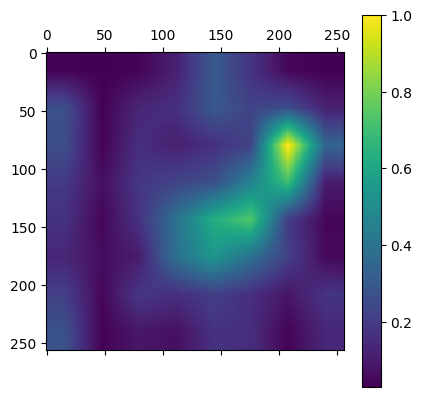

pituitary_tumor
pituitary_tumor


C:\Users\gabeb\AppData\Local\Temp\ipykernel_25404\2312867614.py:75: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  heatmap_resized = heatmap_pil.resize((img_pil.width, img_pil.height), Image.LANCZOS)


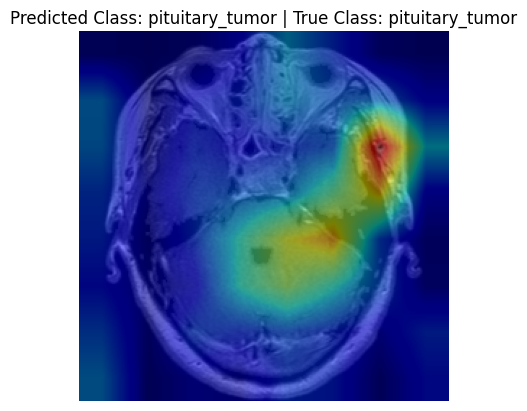

13
Label of image at index 13: 1
tensor([3], device='cuda:0')


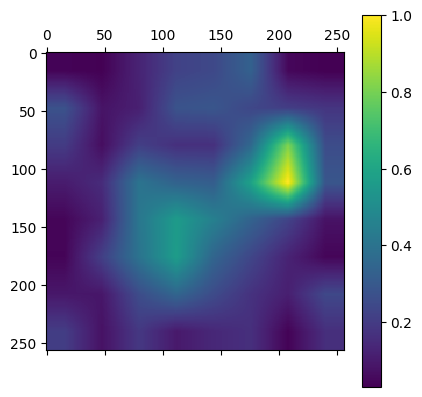

pituitary_tumor
meningioma_tumor


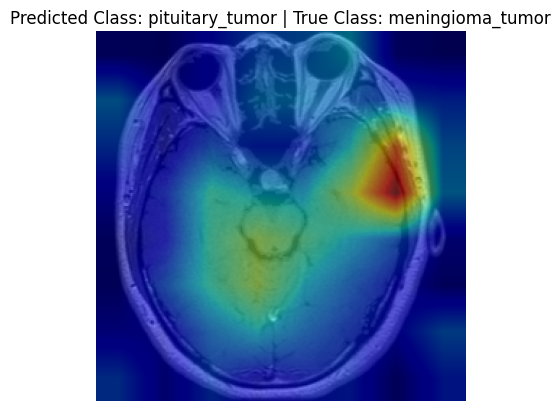

18
Label of image at index 18: 1
tensor([1], device='cuda:0')


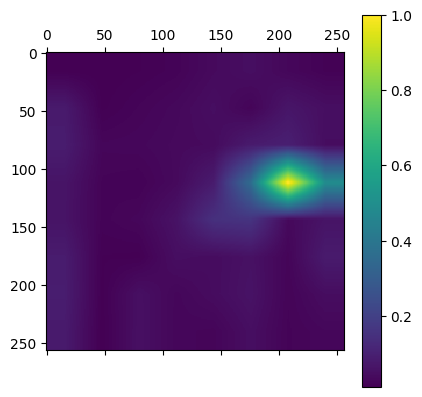

meningioma_tumor
meningioma_tumor


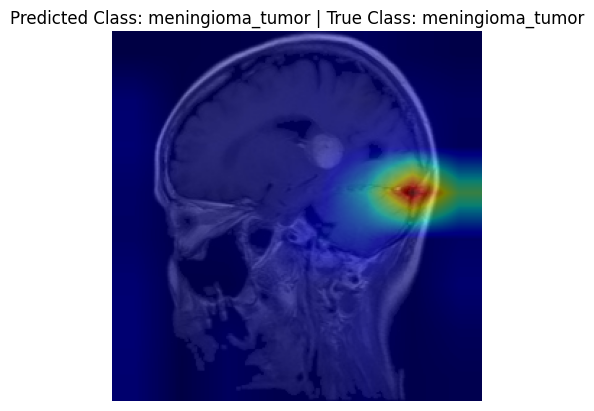

17
Label of image at index 17: 2
tensor([3], device='cuda:0')


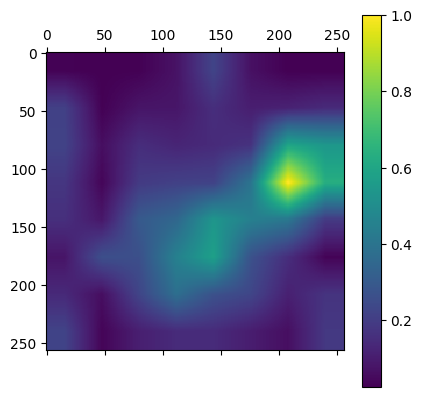

pituitary_tumor
normal


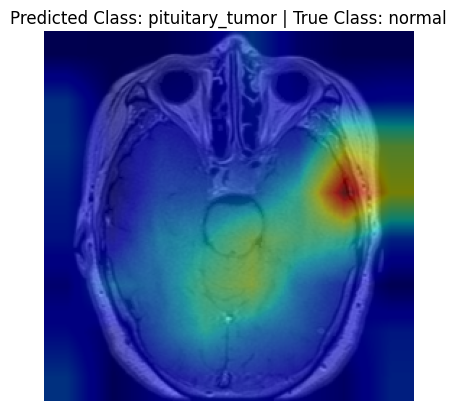

8
Label of image at index 8: 2
tensor([3], device='cuda:0')


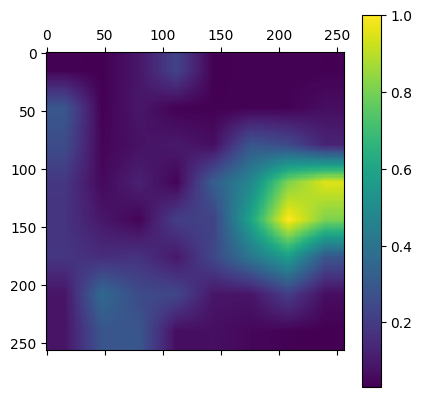

pituitary_tumor
normal


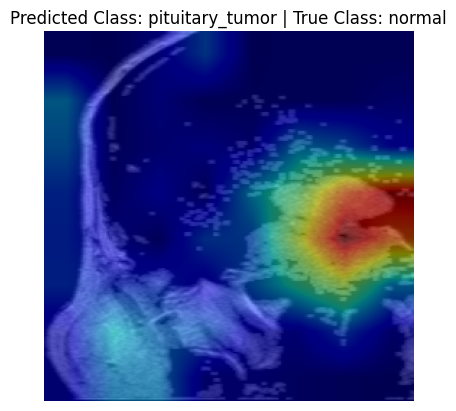

2
Label of image at index 2: 1
tensor([3], device='cuda:0')


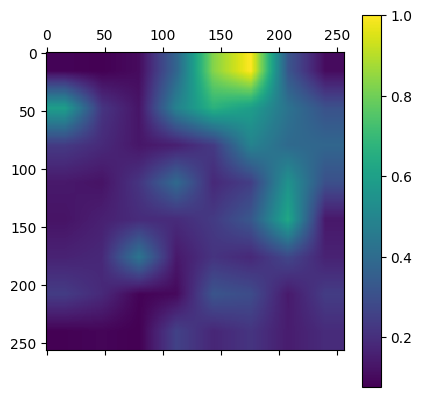

pituitary_tumor
meningioma_tumor


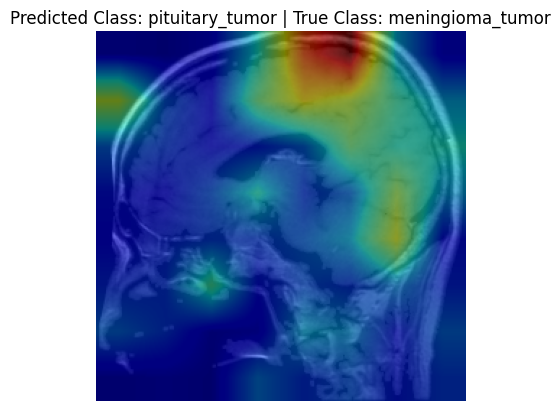

15
Label of image at index 15: 0
tensor([0], device='cuda:0')


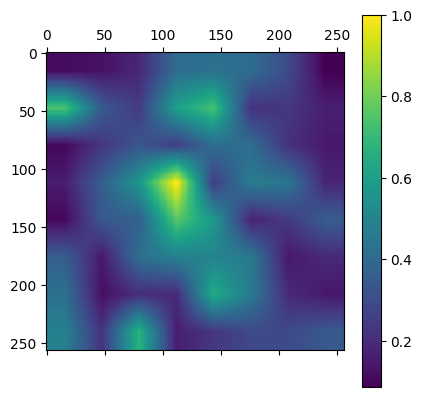

glioma_tumor
glioma_tumor


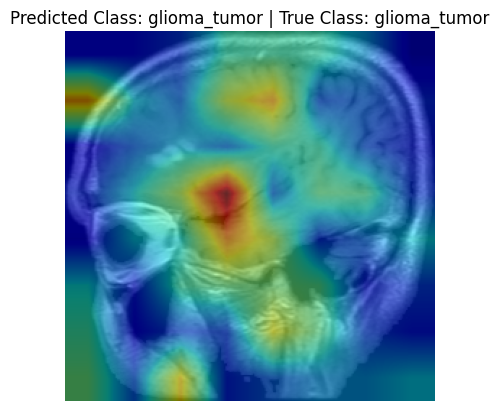

7
Label of image at index 7: 3
tensor([2], device='cuda:0')


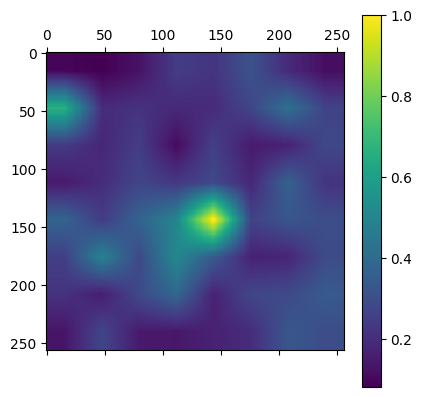

normal
pituitary_tumor


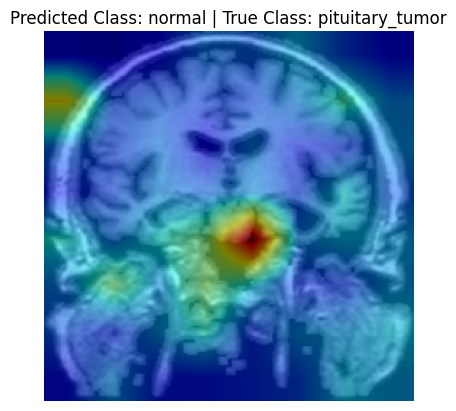

16
Label of image at index 16: 0
tensor([2], device='cuda:0')


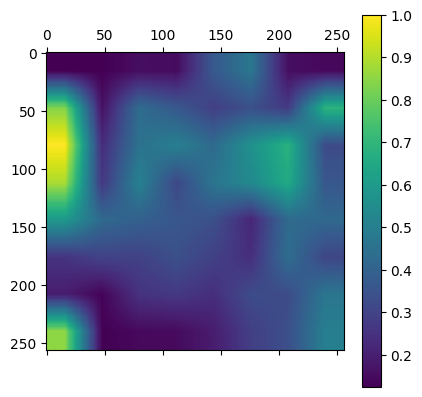

normal
glioma_tumor


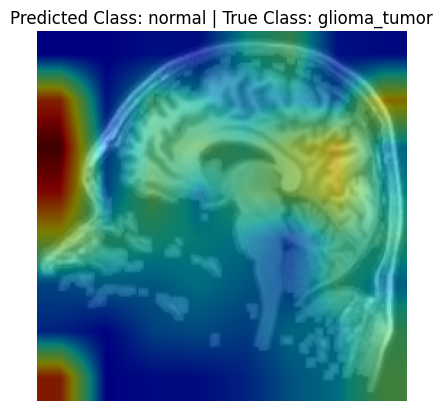

3
Label of image at index 3: 2
tensor([3], device='cuda:0')


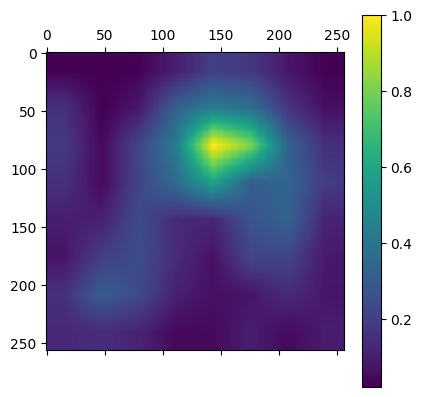

pituitary_tumor
normal


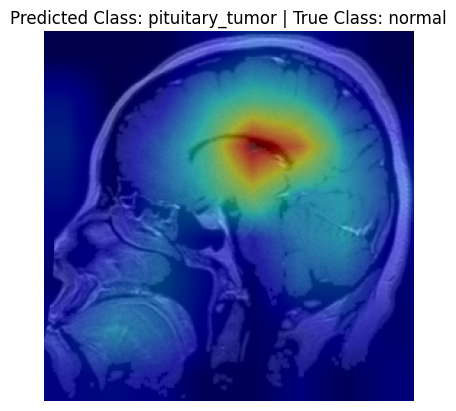

In [15]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_images = len(test_loader.dataset)
print(num_images)
random_index = random.randint(0, num_images - 1)

# set the evaluation mode
_ = model.eval()
num_images_to_process = 10
available_indices = list(range(len(test_loader)))

for _ in range(num_images_to_process):
    specified_index = random.sample(available_indices, 1)[0]
    available_indices.remove(specified_index)
    print(specified_index)
    for idx, (images, labels) in enumerate(test_loader):
        if idx == specified_index:
            label_of_image = labels[0]  # Assuming you're dealing with a single image per batch
            print(f"Label of image at index {specified_index}: {label_of_image}")
            break

    img, _ = next(iter(test_loader))
    img = img.to(device)
    
    # Access the image at the specified index
    img = img[specified_index].unsqueeze(0) 

    # Forward pass to get predictions
    pred = resnet(img)
    predicted_class = pred.argmax(dim=1)
    print(predicted_class)
    
    # Compute loss only for predicted class
    loss = pred[:, predicted_class].sum()
    
    # Backward pass
    loss.backward()
    
    # Pull the gradients out of the model
    gradients = model.get_gradient()
    
    # Pool the gradients across the channels
    pooled_gradients = torch.mean(gradients, dim=[0, 2, 3])
    
    # Get the activations of the last convolutional layer
    activations = model.get_activations(img).detach()
    
    # Weight the channels by corresponding gradients
    for i in range(512):
        activations[:, i, :, :] *= pooled_gradients[i]
    
    

    upsampled_heatmap = torch.nn.functional.interpolate(activations, size=(256, 256), mode='bilinear', align_corners=False)
    
    # Average the channels of the upsampled heatmap
    heatmap = torch.mean(upsampled_heatmap, dim=1).squeeze().cpu().detach().numpy()
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    # Display the heatmap
    plt.matshow(heatmap)
    plt.colorbar()
    plt.show()

    # Create heatmap as PIL image
    heatmap_pil = Image.fromarray(np.uint8(plt.cm.jet(heatmap) * 255))

    # Convert the tensor image to a PIL image
    img_pil = transforms.ToPILImage()(img.squeeze(0).cpu())

    # Resize heatmap to match the image size
    heatmap_resized = heatmap_pil.resize((img_pil.width, img_pil.height), Image.Resampling.LANCZOS)


    # Blend the heatmap onto the image with transparency
    blended = Image.blend(img_pil.convert("RGBA"), heatmap_resized.convert("RGBA"), alpha=0.5)

    # Display the superimposed image
    predicted_label = predicted_class[0]
    predicted_label = class_names[predicted_label]
    print(predicted_label)
    true_label = class_names[label_of_image]
    print(true_label)
    plt.imshow(blended)
    plt.title(f"Predicted Class: {predicted_label} | True Class: {true_label}")
    plt.axis('off')
    plt.show()
    
    del img, pred, heatmap, img_pil  # Delete tensors
    torch.cuda.empty_cache() 



